# Chapter 3 - Linear Regression

This question involves the use of simple linear regression on the Auto data set.

Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the output.

In [1]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot

## 8 - This question involves the use of simple linear regression on the Auto data set.

In [2]:
# Read data

file = 'data/Auto.csv'
auto = pd.read_csv(file)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# Find the number of missing values in each column in this dataset.

auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
auto['horsepower'] = auto['horsepower'].replace('?',np.nan)
auto.dropna(inplace = True)
auto['horsepower'] = auto['horsepower'].astype('float')

In [6]:
# Find the number of missing values in each column in this dataset.
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [7]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [8]:
X = auto['horsepower']  # Predictor variable
y = auto['mpg']         # Response variable

# Convert to numpy arrays
X = np.asarray(X)
y = np.asarray(y)

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           7.03e-81
Time:                        16:57:02   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

**i. Is there a relationship between the predictor and the response?**

Yes, there is a relationship between the predictor (horsepower) and the response (mpg). This can be inferred from the coefficients of the linear regression model:

    The coefficient for horsepower is -0.1578. This indicates that for every one-unit increase in horsepower, the mpg decreases by approximately 0.1578 units.
    
    The p-value associated with the coefficient for horsepower is very small (P < 0.0001), indicating that the coefficient is statistically significant.

**ii. How strong is the relationship between the predictor and the response?**

The R-squared value is 0.606, which means that approximately 60.6% of the variability in mpg can be explained by the linear relationship with horsepower.

We can conclude that the relationship between horsepower and mpg is moderately strong.

**iii. Is the relationship between the predictor and the response positive or negative?**

The relationship between the predictor (horsepower) and the response (mpg) is negative.

This can be determined from the coefficient associated with the horsepower variable in the regression results. In the provided output, the coefficient for horsepower is -0.1578. Since this coefficient is negative, it indicates that there is a negative relationship between horsepower and mpg.

In other words, as horsepower increases, mpg tends to decrease, and vice versa.

**iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?**

In [9]:
# To predict the mpg associated with a horsepower of 98, we can use the regression equation obtained 
# from the OLS results:

mpg = 39.9359 + (-0.1578 * 98)

print("Mpg:", round(mpg,2))

Mpg: 24.47


To calculate the 95% confidence and prediction intervals, we can use the get_prediction method of the regression model object.

In [10]:
# Create a new DataFrame with the intercept and horsepower
new_data = pd.DataFrame({'const': 1, 'horsepower': 98}, index=[0])

# Predict mpg for a horsepower of 98
prediction = model.get_prediction(new_data)

# Extract confidence intervals with 95% confidence
confidence_intervals = prediction.conf_int()

# Extract prediction intervals with 95% confidence
prediction_intervals = prediction.conf_int(alpha=0.05, obs=True)

# Print the results
print("\n95% Confidence Intervals:")
print(confidence_intervals)

print("\n95% Prediction Intervals:")
print(prediction_intervals)


95% Confidence Intervals:
[[23.97307896 24.96107534]]

95% Prediction Intervals:
[[14.80939607 34.12475823]]


In [11]:
# Given values
predicted_mpg = 24.4835  # Predicted mpg for horsepower of 98
standard_error = 0.006  # Standard error

# Critical t-value for a 95% confidence level
# Since we don't have exact degrees of freedom, we'll use a large sample approximation
# For a 95% confidence level, the critical t-value is approximately 1.96
critical_t_value = 1.96

# Calculate the margin of error
margin_of_error = critical_t_value * standard_error

# Calculate the confidence interval
lower_bound = predicted_mpg - margin_of_error
upper_bound = predicted_mpg + margin_of_error

# Print the confidence interval
print("95% Confidence Interval:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

95% Confidence Interval:
Lower Bound: 24.47174
Upper Bound: 24.49526


**Plot the response and the predictor in a new set of axes ax. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.**

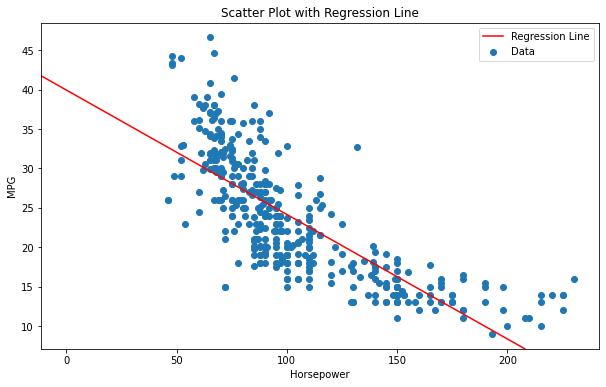

In [12]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data points
ax.scatter(auto['horsepower'], auto['mpg'], label='Data')

# Plot the least squares regression line
ax.axline((0, model.params[0]), slope=model.params[1], color='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('Scatter Plot with Regression Line')

# Show legend
ax.legend()

# Show plot
plt.show()

**Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see
with the fit.**

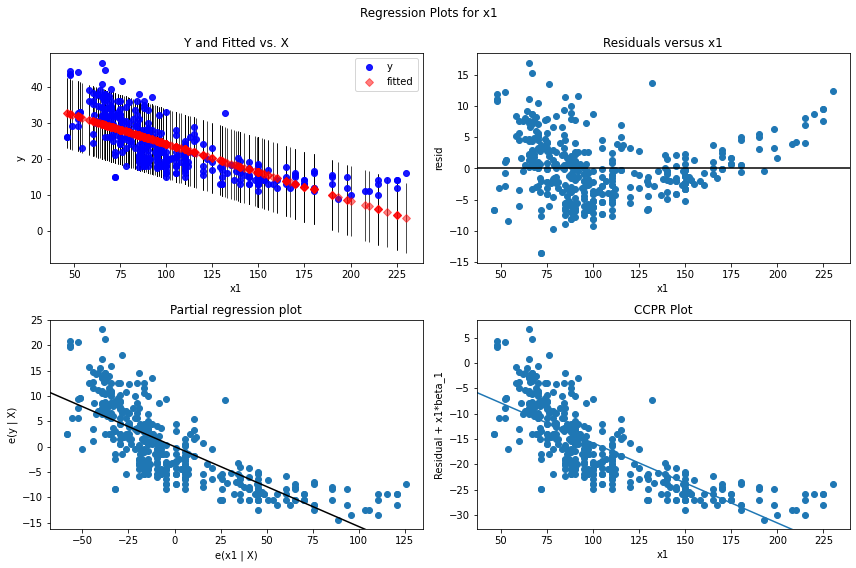


95% Prediction Intervals:
[[23.97307896 24.96107534]]


In [13]:
# Create a new data frame with the intercept and horsepower
new_data = pd.DataFrame({'const': 1, 'x1': [98]})  # Adjusted the variable name horsepower to 'x1'

# Create the regression model
model = sm.OLS(y, X).fit()

# Produce diagnostic plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'x1', fig=fig)  # Adjusted the variable name horsepower to 'x1'
plt.show()

# Predict mpg for a horsepower of 98
prediction = model.get_prediction(new_data)

# Extract prediction intervals with 95% confidence
prediction_intervals = prediction.conf_int(alpha=0.05)

# Print the results
print("\n95% Prediction Intervals:")
print(prediction_intervals)

## 9 - This question involves the use of multiple linear regression on the Auto data set.

**Produce a scatterplot matrix which includes all of the variables in the data set.**

In [14]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


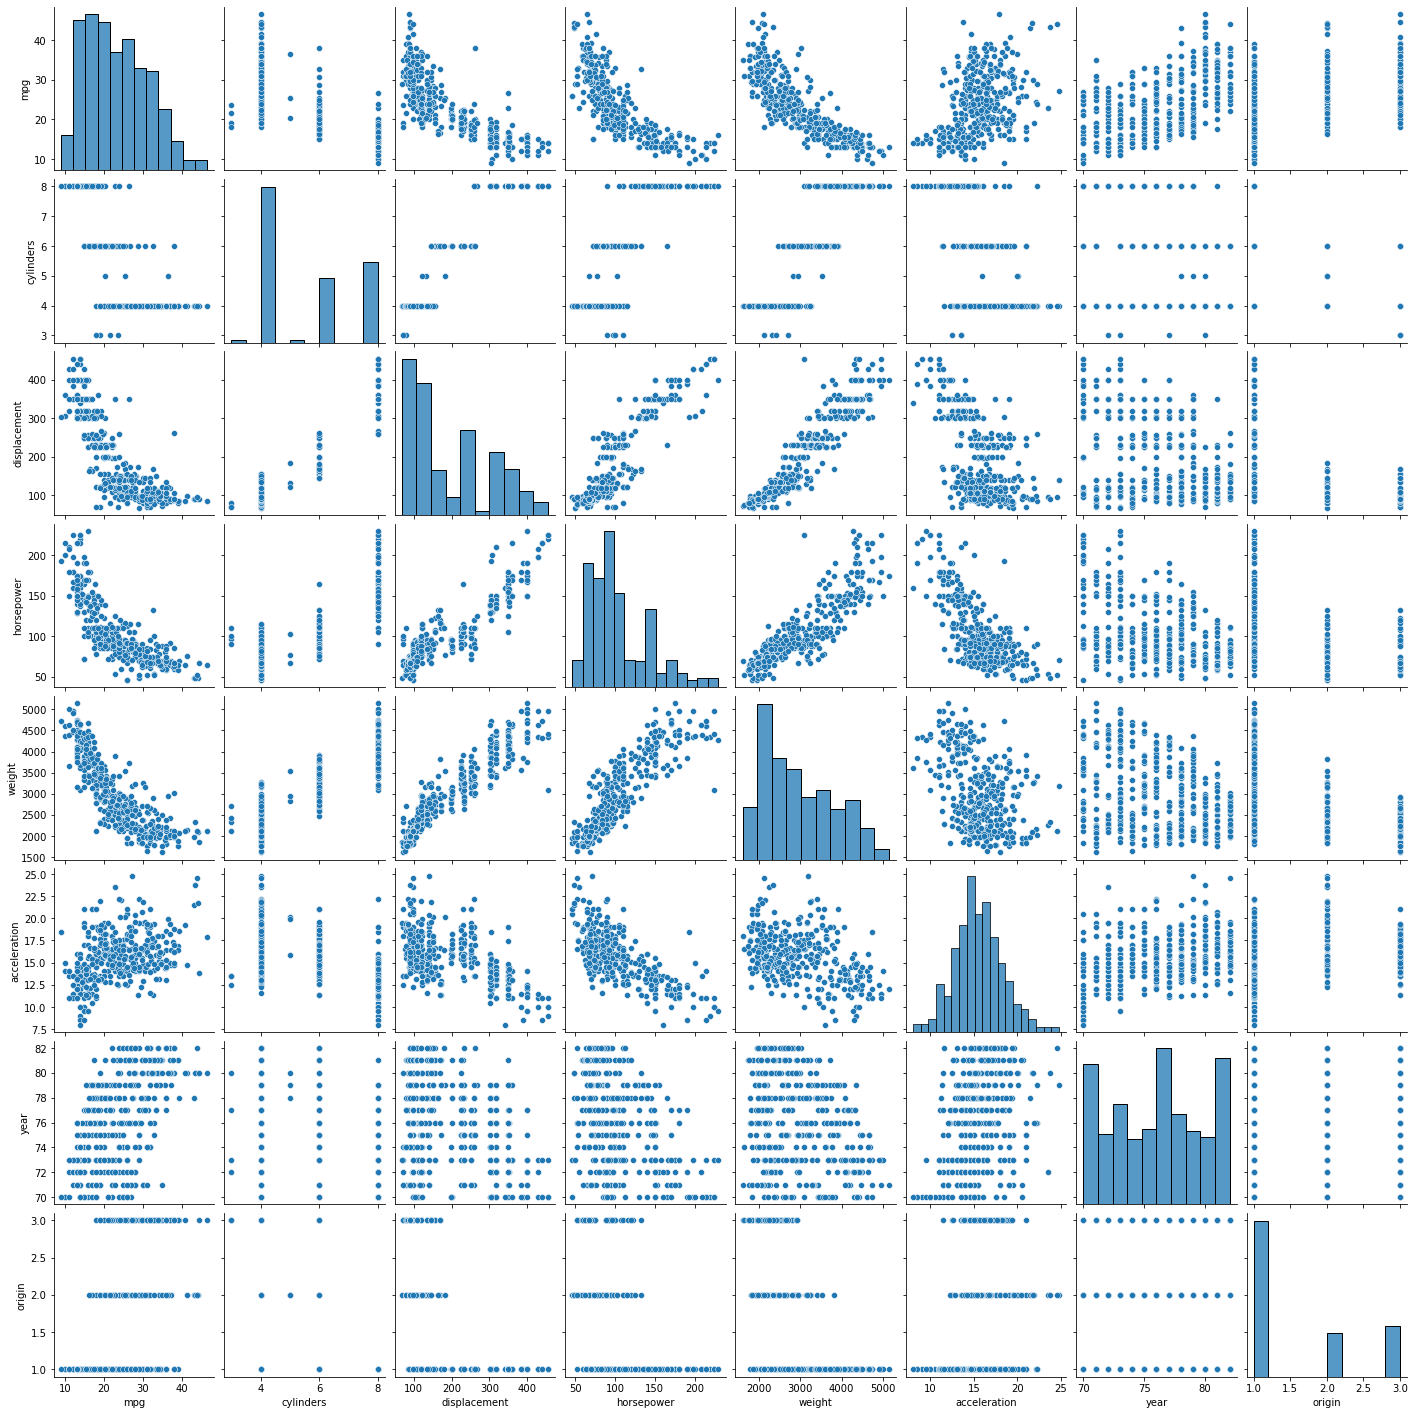

In [15]:
# Create pairwise scatterplots of data set

sns.pairplot(auto)

**Compute the matrix of correlations between the variables using the `DataFrame.corr()` method**

In [16]:
# Calculate the correlation matrix
corr_matrix = auto.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  

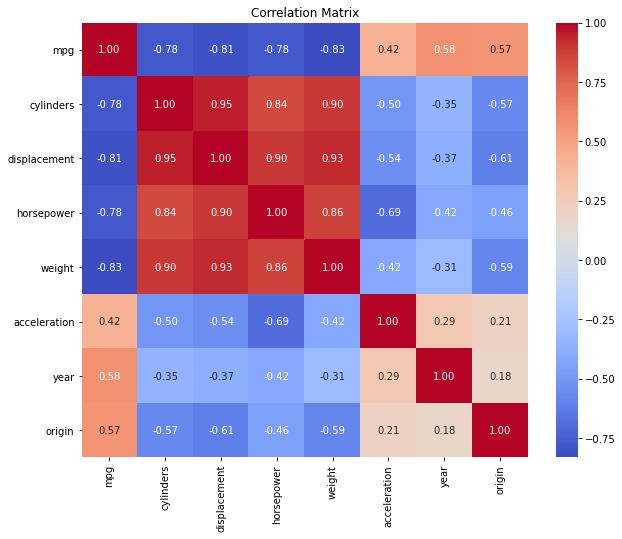

In [17]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `summarize()` function to print the results. Comment on the output. 

In [18]:
# Get all column names
columns = auto.columns.tolist()
columns

'''
####In case of check########
# Iterate over each column in the DataFrame
for column in auto.columns:
    # Print the unique values of the column
    print(f"Unique values in column '{column}': {auto[column].unique()}")
'''

'\n####In case of check########\n# Iterate over each column in the DataFrame\nfor column in auto.columns:\n    # Print the unique values of the column\n    print(f"Unique values in column \'{column}\': {auto[column].unique()}")\n'

In [19]:
# Drop rows with missing values
auto.dropna(inplace=True)

# Define response variable (mpg) and predictor variables
response_variable = auto['mpg']
predictor_variables = auto.drop(columns=['mpg', 'name'])

# Add constant term for the intercept
predictor_variables = sm.add_constant(predictor_variables)

# Fit the multiple linear regression model
model = sm.OLS(response_variable, predictor_variables).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.04e-139
Time:                        16:57:18   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

**i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from statsmodels to answer this question.**

In [20]:
# Fit the full model (with all predictors)
full_model = sm.OLS(auto['mpg'], predictor_variables).fit()

# Fit the reduced model (without any predictors)
reduced_model = sm.OLS(auto['mpg'], sm.add_constant(np.ones_like(auto['mpg']))).fit()

# Perform ANOVA test to compare the models
anova_results = anova_lm(reduced_model, full_model)

# Print ANOVA results
print(anova_results)

   df_resid           ssr  df_diff       ss_diff           F         Pr(>F)
0     391.0  23818.993469      0.0           NaN         NaN            NaN
1     384.0   4252.212530      7.0  19566.780939  252.428045  2.037106e-139


Based on the ANOVA results:

    The F-statistic is 252.43.
    The p-value (Pr(>F)) is approximately 2.04e-139, which is extremely small.

Since the p-value is much smaller than any reasonable significance level (e.g., 0.05), we reject the null hypothesis and conclude that adding the predictors significantly improves the model fit. Therefore, there is a relationship between the predictors (cylinders, displacement, horsepower, weight, acceleration, year, origin) and the response variable (mpg).

**ii. Which predictors appear to have a statistically significant relationship to the response?**

`displacement`, `weight`, `year`, and `origin` have p-values less than 0.05.`const`, representing the intercept term, also has a p-value less than 0.05.
    
Therefore, the predictors `displacement`, `weight`, `year`, and `origin` appear to have statistically significant relationships with the response variable `mpg`

**iii. What does the coefficient for the year variable suggest?**

In this case, the coefficient for the `year` variable is 0.7508. This suggests that, on average, for each one-year increase in the model year of the car, the mpg is expected to increase by approximately 0.7508 units, holding all other predictors constant.

Therefore, the coefficient for the year variable suggests a positive relationship between the model year of the car and its `mpg`, indicating that newer cars tend to have higher miles per gallon

**Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

C:\Users\Jack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jack\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


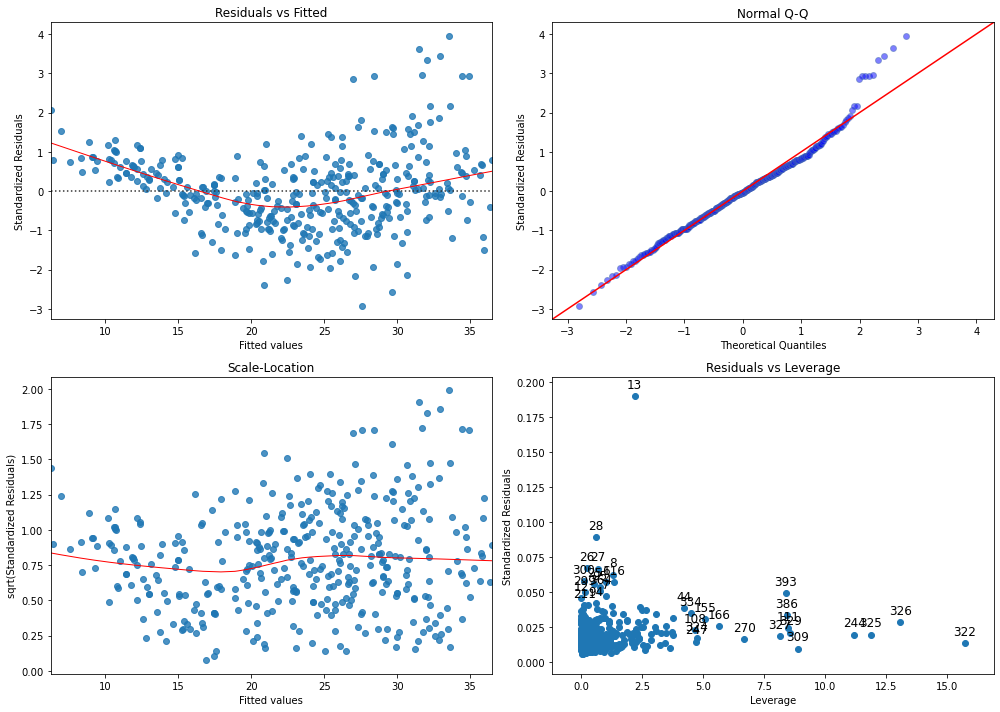

In [21]:
# Compute standardized residuals manually
standardized_residuals = model.get_influence().resid_studentized_internal

# Create ProbPlot object for the standardized residuals
QQ_residuals = ProbPlot(standardized_residuals)

# Create diagnostic plots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Residuals vs. Fitted Values Plot
sns.residplot(model.fittedvalues, standardized_residuals, lowess=True, ax=ax[0, 0], line_kws={'color': 'red', 'lw': 1})
ax[0, 0].set_title('Residuals vs Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Standardized Residuals')

# Normal Q-Q Plot of Standardized Residuals
QQ_residuals.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[0, 1].set_xlabel('Theoretical Quantiles')
ax[0, 1].set_ylabel('Standardized Residuals')

# Scale-Location Plot
sns.regplot(model.fittedvalues, np.sqrt(np.abs(standardized_residuals)), lowess=True, ax=ax[1, 0], line_kws={'color': 'red', 
                                                                                                             'lw': 1})
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('sqrt(Standardized Residuals)')

# Residuals vs. Leverage Plot
sm.graphics.plot_leverage_resid2(model, ax=ax[1, 1])
ax[1, 1].set_title('Residuals vs Leverage')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()

**Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?**

In [22]:
from statsmodels.formula.api import ols

# Fit a model with interactions
model_interaction = ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year \
                            + origin + cylinders:weight + displacement:weight + horsepower:weight', data=auto).fit()

# Print the summary of the model
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.64e-157
Time:                        16:57:21   Log-Likelihood:                -972.46
No. Observations:                 392   AIC:                             1967.
Df Residuals:                     381   BIC:                             2011.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7763    

The interaction term **horsepower:weight** has a p-value of 0.002, suggesting that it is statistically significant.
The interaction term **displacement:weight** has a p-value of 0.368, indicating that it is not statistically significant.
The interaction term **cylinders:weight** has a p-value of 0.932, which also suggests that it is not statistically significant.

Therefore, among the interaction terms included in the model, only **horsepower:weight** appears to have a statistically significant relationship with the response variable **mpg**. The other interaction terms, **displacement:weight** and **cylinders:weight**, do not seem to have a significant impact on **mpg**.

**Try a few different transformations of the variables, such as log(X), √X, X2. Comment on your findings.**

In [23]:
# Logarithmic Transformation
predictor_variables_log = np.log(predictor_variables)

# Square Root Transformation
predictor_variables_sqrt = np.sqrt(predictor_variables)

# Squared Transformation
predictor_variables_squared = predictor_variables ** 2

# Fit the linear regression models for each transformation
model_log = sm.OLS(auto['mpg'], sm.add_constant(predictor_variables_log)).fit()
model_sqrt = sm.OLS(auto['mpg'], sm.add_constant(predictor_variables_sqrt)).fit()
model_squared = sm.OLS(auto['mpg'], sm.add_constant(predictor_variables_squared)).fit()

# Print the summaries of the regression results
print("Logarithmic Transformation:")
print(model_log.summary())
print("\nSquare Root Transformation:")
print(model_sqrt.summary())
print("\nSquared Transformation:")
print(model_squared.summary())

Logarithmic Transformation:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          6.67e-153
Time:                        16:57:21   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -66.5

    1.Logarithmic Transformation: We apply the natural logarithm function (np.log) to the predictor variable.
    2.Square Root Transformation: We apply the square root function (np.sqrt) to the predictor variable.
    3.Squared Transformation: We square the predictor variable (**2).

1. Logarithmic Transformation:

The R-squared value is 0.848, indicating that around 84.8% of the variance in the response variable (mpg) is explained by the predictors. Some coefficients have changed significantly compared to the original model, and their interpretations differ due to the logarithmic transformation. For example, the coefficient for year is 54.9857, suggesting that for each unit increase in the logarithm of the year, the mpg increases by approximately 55 units, holding other variables constant.

2. Square Root Transformation:

The R-squared value is 0.834, indicating that around 83.4% of the variance in the response variable is explained by the predictors. Similar to the logarithmic transformation, the coefficients have changed, and their interpretations differ.
For example, the coefficient for weight is -0.6217, suggesting that for each unit increase in the square root of weight, the mpg decreases by approximately 0.622 units, holding other variables constant.

3. Squared Transformation:

The R-squared value is 0.798, indicating that around 79.8% of the variance in the response variable is explained by the predictors. The interpretations of coefficients are different due to the squared transformation. For example, the coefficient for year is 0.0050, suggesting that for each unit increase in the square of the year, the mpg increases by approximately 0.005 units, holding other variables constant.

## 10 - This question should be answered using the Carseats data set.

In [24]:
# Read data

file = 'data/Carseats.csv'
carseat = pd.read_csv(file)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [25]:
carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [26]:
print(carseat['Urban'].unique())

['Yes' 'No']


In [27]:
print(carseat['US'].unique())

['Yes' 'No']


In [28]:
# Examination of observations by species using values_counts()

carseat['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [29]:
# Define the mapping dictionary
mapping = {'Yes': 1, 'No': 0}
mapping_shelve = {'Good': 1, 'Bad': 0, 'Medium': 0.5}

# Convert 'Urban', 'US', and 'ShelveLoc' columns
carseat['Urban'] = carseat['Urban'].map(mapping)
carseat['US'] = carseat['US'].map(mapping)
carseat['ShelveLoc'] = carseat['ShelveLoc'].map(mapping_shelve)

carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 34.5 KB


In [30]:
carseat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 34.5 KB


**Fit a multiple regression model to predict Sales using Price, Urban, and US.**

In [31]:
# Get all column names
columns = carseat.columns.tolist()
columns

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [32]:
# Find the number of missing values in each column in this dataset.

carseat.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [33]:
# Define response variable (mpg) and predictor variables
response_variable = carseat['Sales']
predictor_variables = carseat[['Price', 'Urban', 'US']]

# Add constant term for the intercept
predictor_variables = sm.add_constant(predictor_variables)

# Fit the multiple linear regression model
model = sm.OLS(response_variable, predictor_variables).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.39e-23
Time:                        16:57:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

**Const (Intercept):**

Coefficient (coef): 13.0435

Interpretation: When all predictor variables (Price, Urban, US) are zero, the expected value of Sales is 13.0435.

Practical Interpretation: This is the baseline level of Sales when all other predictors are absent. It represents the intercept of the regression line.

**Price:**

Coefficient (coef): -0.0545

Interpretation: For each one-unit increase in Price, the Sales decrease by 0.0545 units, holding other predictors constant.

Practical Interpretation: As the price of the product increases, the sales tend to decrease. This coefficient indicates the impact of Price on Sales.

**Urban:**

Coefficient (coef): -0.0219

Interpretation: For a unit change in the Urban predictor (e.g., from "No" to "Yes"), there is a change of -0.0219 units in Sales, holding other predictors constant.

Practical Interpretation: Being in an urban location has a negligible effect on Sales. This coefficient suggests that the Urban predictor doesn't have a significant impact on Sales, as indicated by its high p-value (0.936).

**US:**

Coefficient (coef): 1.2006

Interpretation: For a unit change in the US predictor (e.g., from "No" to "Yes"), there is a change of 1.2006 units in Sales, holding other predictors constant.

Practical Interpretation: Being in the US market has a significant positive impact on Sales. This coefficient suggests that being in the US market increases Sales by approximately 1.2006 units compared to not being in the US market.

**Write out the model in equation form, being careful to handle the qualitative variables properly.**

    Sales = 13.0435 - 0.0545 * Price - 0.0219 * Urban + 1.2006 * US + epsilon
    
    b0 = 13.0435 (Const)
    b1 = −0.0545 (Price)
    b2 = −0.0219 (Urban)
    b3 = 1.2006 (Us)

**For which of the predictors can you reject the null hypothesis**

**H0 : βj = 0?**

If the p-value for a predictor is less than the chosen significance level (commonly 0.05), then we reject the null hypothesis for that predictor. This indicates that the predictor has a statistically significant effect on the response variable.

For the predictor `Price`, the p-value is much less than 0.05 (it is given as 0.000), so we can reject the null hypothesis for Price. This suggests that Price has a statistically significant effect on Sales.

For the predictors `Urban` and `US`, the p-values are greater than 0.05 (0.936 and 0.000 respectively). Therefore, we fail to reject the null hypothesis for Urban, but we reject the null hypothesis for US. This indicates that Urban does not have a statistically significant effect on Sales, while US does have a statistically significant effect.

In summary, we can reject the null hypothesis for the `Price` and `US` predictors, but we fail to reject the null hypothesis for the `Urban` predictor.

**On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is
evidence of association with the outcome.**

Based on the results of the previous question, we can fit a smaller model that includes only the predictors "Price" and "US", as these are the predictors for which there is evidence of association with the outcome (Sales).

In [34]:
# Define response variable (Sales) and predictor variables
response_variable = carseat['Sales']
predictor_variables = carseat[['Price', 'US']]

# Add constant term for the intercept
predictor_variables = sm.add_constant(predictor_variables)

# Fit the multiple linear regression model
smaller_model = sm.OLS(response_variable, predictor_variables).fit()

# Print the summary of the regression results for the smaller model
print(smaller_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.66e-24
Time:                        16:57:21   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

The smaller model includes only the predictors "Price" and "US". Here's the interpretation of each coefficient in the model:

Intercept (const): The intercept represents the estimated sales when all predictors are set to zero. In this case, it represents the estimated sales when the price is zero and the product is not made in the US. However, this interpretation is not meaningful in the context of the data because price cannot be zero and the product is either made in the US or not.

Price: The coefficient for Price is -0.0545. This means that, holding all other variables constant, for every one unit increase in the price of the car seat, the sales decrease by 0.0545 units, on average.

US: The coefficient for US is 1.1996. This is interpreted as follows: when the product is made in the US (US=1), the sales are expected to be higher by approximately 1.1996 units compared to when the product is not made in the US (US=0), holding all other variables constant.

The p-values associated with both Price and US are less than 0.05, indicating that we can reject the null hypothesis (H0: βj = 0) for both predictors. Therefore, both Price and US are statistically significant predictors of Sales in this model.

**How well do the models in (a) and (e) fit the data?**

To assess how well the models fit the data, we typically look at the coefficient of determination (R^2) and the adjusted coefficient of determination (R^2adj).

For the first model (with all predictors "Price", "Urban", and "US"), the R^2 value is 0.239 and the adjusted R^2 is 0.234. This means that approximately 23.9% of the variance in the response variable (Sales) can be explained by the predictors included in the model. The adjusted R^2 takes into account the number of predictors in the model and provides a more conservative estimate of the model's goodness of fit.

For the second model (with only predictors "Price" and "US"), the R^2 value is 0.239 and the adjusted R^2 is 0.235. These values are slightly lower than the corresponding values for the first model. However, since the second model has fewer predictors, the adjusted R^2 penalizes less for the reduction in degrees of freedom, resulting in a slightly higher adjusted R^2 compared to the first model.

**Using the model from (e), obtain 95 % confidence intervals for the coefficient(s)**

For the coefficient of "Price", the 95% confidence interval is approximately (-0.065, -0.044).

For the coefficient of "US", the 95% confidence interval is approximately (0.692, 1.708).

These confidence intervals indicate the range of values within which we are 95% confident that the true population coefficient lies. Since the intervals do not contain zero, we can conclude that both "Price" and "US" are statistically significant predictors of "Sales" at the 0.05 level of significance.

**Is there evidence of outliers or high leverage observations in the model from (e)?**

    Residuals vs. Fitted: Checks for linearity and homoscedasticity.
    Normal Q-Q plot: Checks for normality of residuals.
    Scale-Location plot: Checks for homoscedasticity.
    Residuals vs. Leverage plot: Helps to identify influential observations.

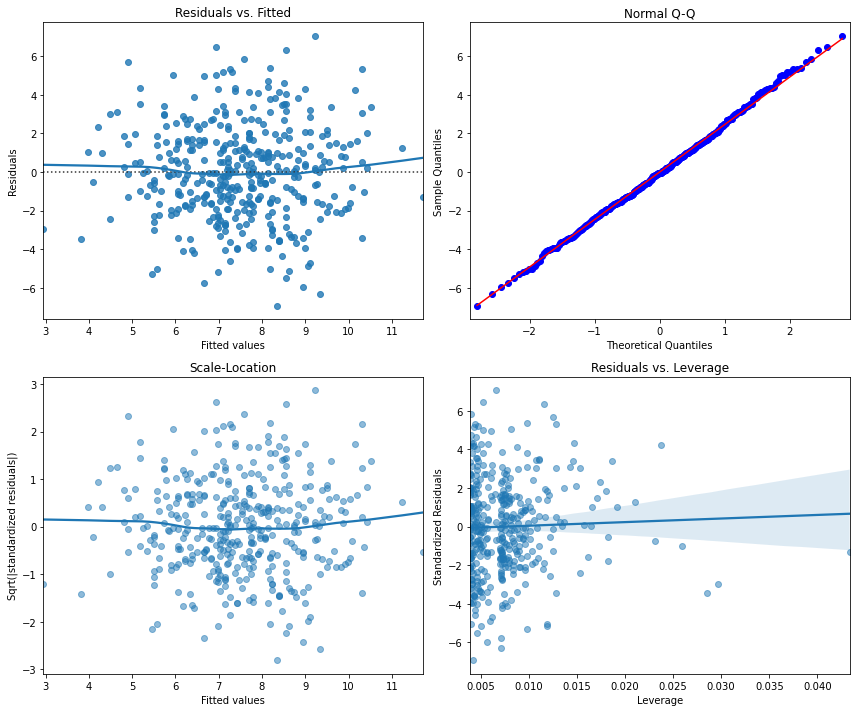

In [35]:
# Fit the second model
model = sm.OLS(response_variable, predictor_variables).fit()

# Plotting the diagnostic plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Residuals vs. Fitted
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, ax=ax[0, 0])
ax[0, 0].set_title('Residuals vs. Fitted')
ax[0, 0].set_xlabel('Fitted values')
ax[0, 0].set_ylabel('Residuals')

# Plot 2: QQ Plot
sm.qqplot(model.resid, line='s', ax=ax[0, 1])
ax[0, 1].set_title('Normal Q-Q')
ax[0, 1].set_xlabel('Theoretical Quantiles')
ax[0, 1].set_ylabel('Sample Quantiles')

# Plot 3: Scale-Location Plot (Sqrt Residuals vs. Fitted)
sns.regplot(x=model.fittedvalues, y=model.get_influence().resid_studentized_internal, 
                                                                        lowess=True, ax=ax[1, 0], scatter_kws={'alpha': 0.5})
ax[1, 0].set_title('Scale-Location')
ax[1, 0].set_xlabel('Fitted values')
ax[1, 0].set_ylabel('Sqrt(|standardized residuals|)')

# Plot 4: Residuals vs. Leverage
sns.regplot(x=model.get_influence().hat_matrix_diag, y=model.resid, ax=ax[1, 1], scatter_kws={'alpha': 0.5})
ax[1, 1].set_title('Residuals vs. Leverage')
ax[1, 1].set_xlabel('Leverage')
ax[1, 1].set_ylabel('Standardized Residuals')

plt.tight_layout()
plt.show()

## 11-  In this problem we will investigate the t-statistic for the null hypothesis 
H0 : β = 0 in simple linear regression without an intercept. 
To begin, we generate a predictor x and a response y as follows.

    rng = np.random.default_rng(1)
    x = rng.normal(size=100)
    y = 2 * x + rng.normal(size=100)

In [36]:
np.random.seed(1)

x = np.random.normal(size = 100)
y = 2*x + np.random.normal(size = 100)

In [37]:
data = pd.DataFrame({'X':x,'y':y})

data.head()

,X,y
0,1.624345,2.801562
1,-0.611756,0.000995
2,-0.528172,-0.652852
3,-1.072969,-1.552359
4,0.865408,0.635903


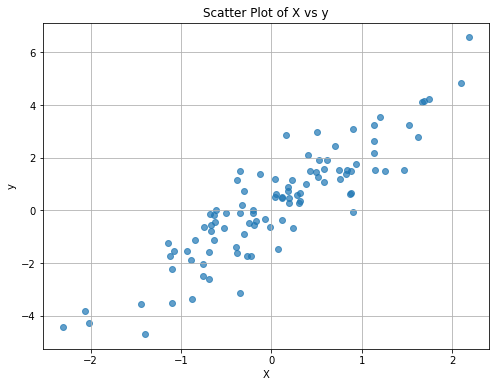

In [38]:
# Plot the data

plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['y'], alpha=0.7)
plt.title('Scatter Plot of X vs y')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

**Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using the keywords argument intercept=False to `ModelSpec()`).**

In [39]:
# Fit simple linear regression model without intercept
model = sm.OLS(data['y'], sm.add_constant(data['X']), hasconst=False).fit()

# Get coefficient estimate, standard error, t-statistic, and p-value
coef_estimate = model.params[0]
std_error = model.bse[0]
t_statistic = model.tvalues[0]
p_value = model.pvalues[0]

# Print results
print("Coefficient Estimate (βˆ):", coef_estimate)
print("Standard Error:", std_error)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Coefficient Estimate (βˆ): 0.14701352969820156
Standard Error: 0.09397758509183546
T-Statistic: 1.5643467487969505
P-Value: 0.12095970269854321


The coefficient estimate (βˆ) is approximately 0.147, indicating that for each unit increase in x, we expect y to increase by approximately 0.147 units on average.

The standard error is approximately 0.094, which measures the variability or uncertainty in the coefficient estimate.

The t-statistic is approximately 1.564, which indicates how many standard deviations the coefficient estimate is from zero.

The p-value associated with the null hypothesis H0 : β = 0 is approximately 0.121. Since the p-value is greater than the commonly used significance level of 0.05, we do not have enough evidence to reject the null hypothesis. Therefore, we cannot conclude that there is a statistically significant linear relationship between x and y at the 5% significance level. However, it's worth noting that the p-value is relatively close to 0.05, so the relationship may be significant at a slightly higher significance level.

**Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.**

In [40]:
# Perform simple linear regression of x onto y without an intercept
model = sm.OLS(data['X'], data['y'], hasconst=False).fit()

# Get coefficient estimate and its standard error
coef_estimate = model.params[0]
std_error = model.bse[0]

# Compute t-statistic and p-value
t_statistic = coef_estimate / std_error
p_value = model.pvalues[0]

# Print results
print("Coefficient Estimate (βˆ):", coef_estimate)
print("Standard Error:", std_error)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

Coefficient Estimate (βˆ): 0.3789044229072016
Standard Error: 0.019144513630155267
T-Statistic: 19.7918019870912
P-Value: 3.457375739189447e-36


The coefficient estimate (βˆ) for the regression of x onto y without an intercept is approximately 0.3789. This indicates that for every one-unit increase in y, x increases by approximately 0.3789 units, holding all other variables constant.

The standard error of the coefficient estimate is approximately 0.0191, suggesting that the estimate is relatively precise.

The t-statistic is approximately 19.7918, indicating that the coefficient estimate is approximately 19.79 standard errors away from zero. This suggests that the coefficient estimate is statistically significant.

The p-value associated with the null hypothesis H0 : β = 0 is approximately 3.46e-36, which is much smaller than any reasonable significance level (e.g., 0.05). Therefore, we reject the null hypothesis and conclude that there is strong evidence that the coefficient for x is significantly different from zero.

**What is the relationship between the results obtained in (a) and (b)?**

The coefficient estimates for both regressions are different, as expected since the regressions are of different variables onto each other.

In the first regression (y onto x), the coefficient estimate is relatively small (0.1470), indicating a weaker relationship between y and x. The t-statistic is low (1.5643), and the p-value (0.1210) is greater than the conventional significance level of 0.05, suggesting that the coefficient for x is not significantly different from zero. Therefore, we may fail to reject the null hypothesis that the coefficient is zero in this case.

In the second regression (x onto y), the coefficient estimate is larger (0.3789), indicating a stronger relationship between x and y. The t-statistic is high (19.7918), and the p-value (3.46e-36) is much smaller than 0.05, providing strong evidence to reject the null hypothesis that the coefficient is zero. Therefore, we conclude that the coefficient for y is significantly different from zero in this case.

Overall, these results demonstrate how the choice of dependent and independent variables can lead to different interpretations of regression coefficients and their significance.

<img src="images/Q11d2.PNG"/>

**Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.**

In [41]:
# Compute necessary sums
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x ** 2)
sum_y_squared = np.sum(y ** 2)
sum_xy = np.sum(x * y)

# Compute t-statistic
n = len(x)
t_statistic_numer = np.sqrt(n-1) * sum_xy
t_statistic_denom = np.sqrt((sum_x_squared * sum_y_squared) - (sum_xy ** 2))
t_statistic = t_statistic_numer / t_statistic_denom

print("T-Statistic:", t_statistic)

T-Statistic: 19.791801987091205


## 12 - This problem involves simple linear regression without an intercept.

**Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?**

The coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X when the standard deviations of X and Y are equal.

In mathematical terms, if sx represents the standard deviation of X and sy represents the standard deviation of Y, then the coefficient estimates for both regressions will be the same if sx=sy.

This condition ensures that the variability in both X and Y directions is balanced, leading to symmetrical relationships between the variables. When the standard deviations are equal, the slopes of the regression lines will also be equal, resulting in identical coefficient estimates for both regressions.

**Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y
is different from the coefficient estimate for the regression of Y onto X.**

In [42]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 100
X = np.random.normal(loc=0, scale=1, size=n)
Y = 2*X + np.random.normal(loc=0, scale=2, size=n)  # Different variances for X and Y

# Create a DataFrame
data2 = pd.DataFrame({'X': X, 'Y': Y})

# Perform regression of X onto Y
X_on_Y_model = sm.OLS(data2['X'], sm.add_constant(data2['Y'])).fit()

# Perform regression of Y onto X
Y_on_X_model = sm.OLS(data2['Y'], sm.add_constant(data2['X'])).fit()

# Display coefficient estimates
print("Coefficient estimate for the regression of X onto Y:", X_on_Y_model.params[1])
print("Coefficient estimate for the regression of Y onto X:", Y_on_X_model.params[1])

Coefficient estimate for the regression of X onto Y: 0.23586153920984604
Coefficient estimate for the regression of Y onto X: 1.7134856794571125


**Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is
the same as the coefficient estimate for the regression of Y onto X.**

In [43]:
# Set random seed for reproducibility
np.random.seed(30)

# Number of observations
n = 100

# Generate X and Y from normal distributions with equal standard deviations
X = np.random.normal(loc=0, scale=2, size=n)
Y = np.random.permutation(X)

# Create DataFrame
data3 = pd.DataFrame({'X': X, 'Y': Y})

# Compute standard deviations
std_dev_X = np.std(data3['X'])
std_dev_Y = np.std(data3['Y'])

# Display standard deviations
print("Standard deviation of X:", std_dev_X)
print("Standard deviation of Y:", std_dev_Y)

# Perform regression of X onto Y
X_on_Y_model = sm.OLS(data3['X'], sm.add_constant(data3['Y'])).fit()

# Perform regression of Y onto X
Y_on_X_model = sm.OLS(data3['Y'], sm.add_constant(data3['X'])).fit()

# Display coefficient estimates
print()
print("Coefficient estimate for the regression of X onto Y:", X_on_Y_model.params[1])
print("Coefficient estimate for the regression of Y onto X:", Y_on_X_model.params[1])

Standard deviation of X: 2.125846638710238
Standard deviation of Y: 2.1258466387102377

Coefficient estimate for the regression of X onto Y: -0.08740627841177173
Coefficient estimate for the regression of Y onto X: -0.08740627841177176


## 13 - In this exercise you will create some simulated data 

**and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.**

Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

In [44]:
np.random.seed(1)

X = np.random.normal(loc = 0,scale = 1,size = 100)

**Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.**

In [45]:
eps = np.random.normal(loc = 0,scale = 0.25,size = 100)

**Using x and eps, generate a vector y according to the model**

    Y = −1 + 0.5X + ϵ

**What is the length of the vector y? What are the values of β0 and β1 in this linear model?**

In [46]:
Y = -1 + 0.5*X + eps

print('Length of y is ',Y.size)

Length of y is  100


β0 = -1 and β1 = 0.5

**Create a scatterplot displaying the relationship between x and y. Comment on what you observe.**

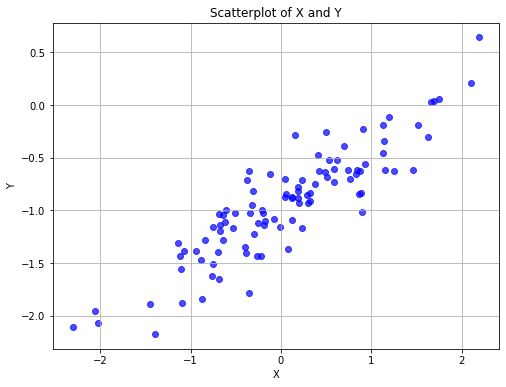

In [47]:
# Create scatterplot

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.7)
plt.title('Scatterplot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

**Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1**

The model obtained provides estimates for the intercept (β^0) and the slope (β^1).

* β^0 represents the estimated intercept of the linear model, which is the predicted value of y when x=0.
* β^1 represents the estimated slope of the linear model, which indicates the change in y for a one-unit increase in x.

Comparing β^0 and β^1 to β0 and β1, respectively:

* If β^0 and β^1 are close to β0 and β1, it suggests that the model accurately captures the relationship between x and y.
* If there is a significant difference between β^0 and β^1 compared to β0 and β1, it indicates that the model may not accurately represent the true relationship between x and y.

In [48]:
# Add constant term for the intercept
X_with_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(Y, X_with_const).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.39e-36
Time:                        16:57:23   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9632      0.023    -40.999      0.0

The OLS regression results provide the following information:

* R-squared: The coefficient of determination (R^2) is 0.800, indicating that approximately 80% of the variability in y can be explained by the linear relationship with x.

Coefficients:

* The coefficient estimate for the intercept (β^0) is approximately -0.9632.
* The coefficient estimate for x (β^1) is approximately 0.5239.
* Standard Errors: The standard errors for β^0 and β^1 are 0.023 and 0.026, respectively. These represent the standard deviations of the sampling distributions of the coefficient estimates.
* T-Statistics: The t-statistics for β^0 and β^1 are -40.999 and 19.783, respectively. These values represent the ratios of the estimated coefficients to their standard errors and are used to test the null hypothesis that the true coefficient is zero.
* P-Values: The p-values associated with the t-tests for β^0 and β^1 are very close to zero (typically below the conventional significance level of 0.05), indicating strong evidence against the null hypothesis that the corresponding coefficients are zero.

Overall, the model appears to provide a good fit to the data, as indicated by the high R-squared value and the significant coefficients. The estimated intercept and slope (β^0 and β^1) are close to the true values (β0 and β1), suggesting that the model accurately captures the relationship between x and y.

**Display the least squares line on the scatterplot obtained before. Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.**

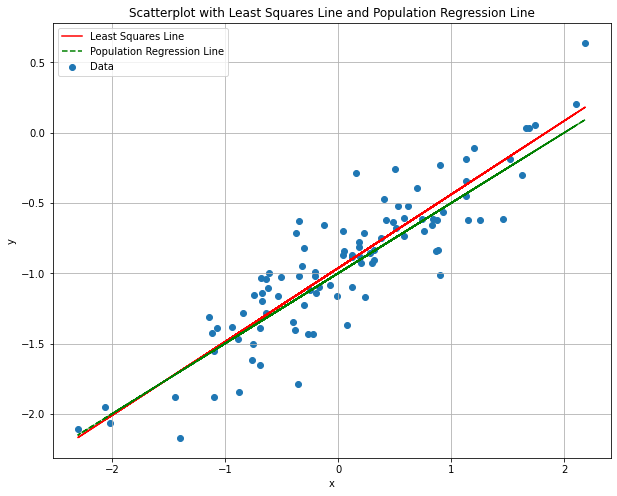

In [49]:
# Generate the data
np.random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
eps = np.random.normal(loc=0, scale=0.25, size=100)
y = -1 + 0.5 * x + eps

# Fit a least squares linear model
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Make the plot bigger
plt.figure(figsize=(10, 8))

# Plot the scatterplot
plt.scatter(x, y, label='Data')

# Overlay the least squares regression line
plt.plot(x, slope * x + intercept, color='red', label='Least Squares Line')

# Plot the population regression line
plt.plot(x, -1 + 0.5 * x, color='green', linestyle='--', label='Population Regression Line')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Least Squares Line and Population Regression Line')

# Show plot
plt.grid(True)
plt.show()

**Now fit a polynomial regression model that predicts y using x and x^2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.**

In [50]:
# Fit polynomial regression model
X_poly = np.column_stack((x, x**2))
X_poly = sm.add_constant(X_poly)  # Add intercept
model_poly = sm.OLS(y, X_poly).fit()

# Print summary of the model
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.32e-34
Time:                        16:57:24   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9663      0.029    -33.486      0.0

The polynomial regression model with x and x^2 as predictors has an R^2 value of 0.800, which indicates that about 80% of the variance in the response variable y is explained by the model. 

However, the coefficient for x^2 is not statistically significant, as indicated by the p-value of 0.856. Additionally, the F-statistic for the overall significance of the model (193.8) is not significantly different from the simple linear regression model, as the p-value is 1.32e-34.

Therefore, based on the lack of significance of the quadratic term (x^2) and the F-statistic, there is no evidence that the quadratic term improves the model fit. The simple linear regression model with only x as a predictor seems to provide a sufficient fit to the data.

**Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.**

In [51]:
# Generate Modified Data

np.random.seed(1)

X = np.random.normal(loc=0, scale=1, size=100)      # (a)
eps = np.random.normal(loc=0, scale=0.1, size=100)  # (b) Decreased variance
Y = -1 + 0.5*X + eps                                # (c)

data = pd.DataFrame({'X': X, 'Y': Y})

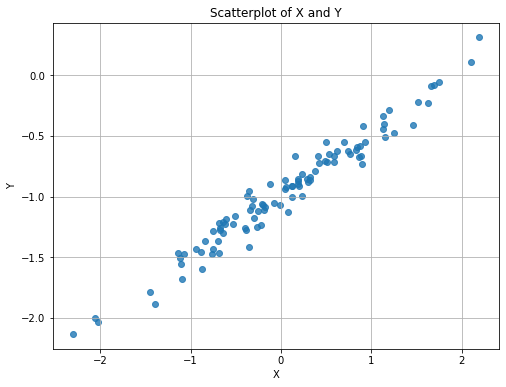

In [52]:
# (d) Scatterplot

plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X and Y')
plt.grid(True)
plt.show()

In [53]:
# (e) Fit a least squares linear model to predict y using x. 

# Add constant term for the intercept
X_with_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(Y, X_with_const).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     2314.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.58e-70
Time:                        16:57:24   Log-Likelihood:                 95.820
No. Observations:                 100   AIC:                            -187.6
Df Residuals:                      98   BIC:                            -182.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9853      0.009   -104.844      0.0

The OLS regression results indicate a very high R-squared value of 0.959, suggesting that the model explains a significant portion of the variance in the data. Both the intercept (βˆ0 ≈ -0.9853) and the coefficient for the predictor variable (βˆ1 ≈ 0.5095) are statistically significant, with very low p-values (close to 0). This suggests that there is strong evidence to reject the null hypothesis that the coefficients are equal to zero.

The coefficient estimates (βˆ0 and βˆ1) are very close to the true population parameters (β0 = -1 and β1 = 0.5), indicating that the model accurately captures the underlying relationship between the predictor and response variables.

Overall, the model obtained from the least squares regression appears to be a good fit for the data, as evidenced by the high R-squared value and the statistical significance of the coefficients.

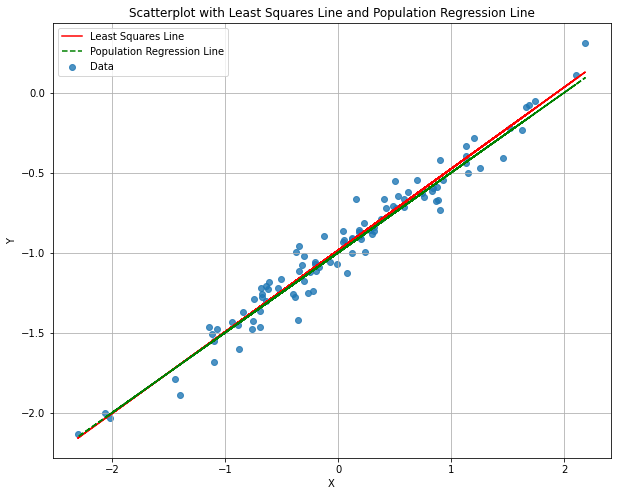

In [54]:
# (f) Scatterplot with Least Squares Line and Population Regression Line

plt.figure(figsize=(10, 8))
plt.scatter(data['X'], data['Y'], alpha=0.8, label='Data')
plt.plot(data['X'], model.predict(sm.add_constant(data['X'])), color='red', label='Least Squares Line')
plt.plot(data['X'], -1 + 0.5*data['X'], color='green', linestyle='--', label='Population Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Least Squares Line and Population Regression Line')
plt.legend()
plt.grid(True)
plt.show()

**Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.**

In [55]:
# Generate Modified Data

np.random.seed(1)

X = np.random.normal(loc=0, scale=1, size=100)      # (a)
eps = np.random.normal(loc=0, scale=0.5, size=100)  # (b) increase variance
Y = -1 + 0.5*X + eps                                # (c)

data = pd.DataFrame({'X': X, 'Y': Y})

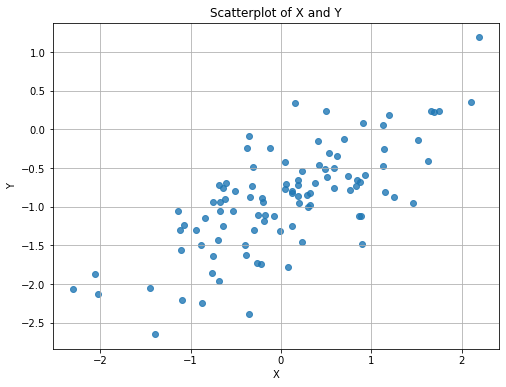

In [56]:
# (d) Scatterplot

plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], alpha=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of X and Y')
plt.grid(True)
plt.show()

In [57]:
# (e) Fit a least squares linear model to predict y using x. 

# Add constant term for the intercept
X_with_const = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(Y, X_with_const).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.20e-17
Time:                        16:57:24   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

In this modified regression model with more noise in the data, the R-squared value is 0.522, indicating that the model explains about 52.2% of the variance in the response variable Y. This is lower than the R-squared value in the previous model, suggesting that the model's explanatory power is reduced due to the increased noise.

The coefficient estimates are as follows:

* βˆ0 (const): -0.9265
* βˆ1 (x1): 0.5477

These coefficients represent the intercept and slope of the least squares line fitted to the data. Compared to the true coefficients β0 = -1 and β1 = 0.5 used to generate the data, the estimated coefficients are close but not exact. This discrepancy is expected due to the noise introduced in the data generation process.

The p-values associated with both coefficients are very small (close to 0), indicating that they are statistically significant at conventional levels of significance (e.g., α = 0.05). Therefore, we can reject the null hypothesis that the coefficients are equal to zero.

Overall, while the model still provides a reasonable fit to the data, the increased noise results in a lower R-squared value and slightly less accurate coefficient estimates compared to the model with less noise.

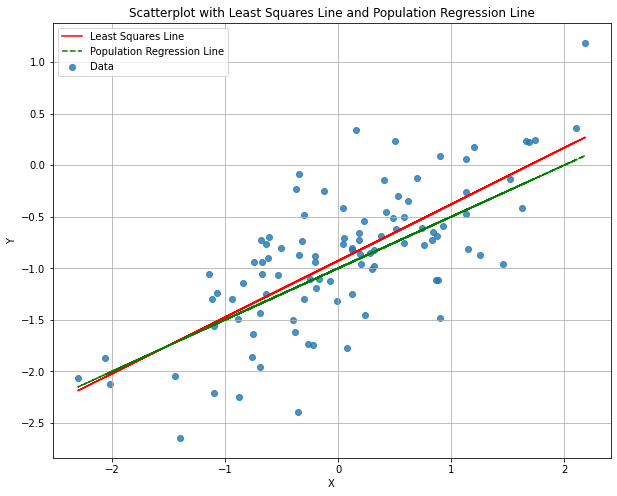

In [58]:
# (f) Scatterplot with Least Squares Line and Population Regression Line

plt.figure(figsize=(10, 8))
plt.scatter(data['X'], data['Y'], alpha=0.8, label='Data')
plt.plot(data['X'], model.predict(sm.add_constant(data['X'])), color='red', label='Least Squares Line')
plt.plot(data['X'], -1 + 0.5*data['X'], color='green', linestyle='--', label='Population Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot with Least Squares Line and Population Regression Line')
plt.legend()
plt.grid(True)
plt.show()

**What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data
set? Comment on your results.**

Let's recap the confidence intervals for β0 and β1 based on the original, noisier, and less noisy datasets:

Original Dataset:

    β0 Confidence Interval: [−1.010,−0.917][−1.010,−0.917]
    β1 Confidence Interval: [0.471,0.576][0.471,0.576]

Less Noisy Dataset:

    β0 Confidence Interval: [−1.004,−0.967][−1.004,−0.967]
    β1 Confidence Interval: [0.489,0.531][0.489,0.531]
    
Noisier Dataset:

    β0 Confidence Interval: [−1.020,−0.833][−1.020,−0.833]
    β1 Confidence Interval: [0.443,0.653][0.443,0.653]


The confidence intervals provide a range of values for each coefficient estimate, reflecting the uncertainty associated with estimating them from a sample of data.

Comparing the confidence intervals across the datasets:

* For β0, the intervals are relatively similar across the datasets, although they vary slightly in width. This suggests that the intercept estimate is fairly stable across different levels of noise in the data.

* For β1, the intervals are wider in the noisier dataset compared to the less noisy dataset, indicating increased uncertainty in estimating the slope parameter when there is more noise in the data.

Overall, the confidence intervals capture the variability in the coefficient estimates and provide a sense of the precision of the estimates. In general, wider intervals indicate greater uncertainty in the estimates, which is expected when there is more noise in the data.

## 14 - This problem focuses on the collinearity problem.
Perform the following commands in Python:

    rng = np.random.default_rng(10)
    x1 = rng.uniform(0, 1, size=100)
    x2 = 0.5 * x1 + rng.normal(size=100) / 10
    y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

In [59]:
# Data generation process

rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The linear model can be expressed as:

    y = β0 + β1 * x1 + β2 * x2 + ε
    
In this case: β0 = 2; β1 = 2; β2 = 0.3.

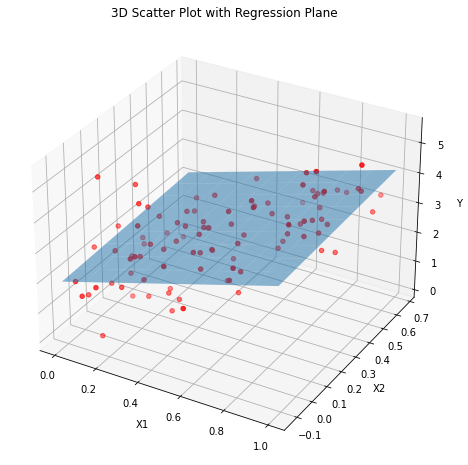

In [60]:
# Create 3D plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x1, x2, y, c='r', marker='o')

# Regression plane
x1_plane, x2_plane = np.meshgrid(np.linspace(0, 1, 10), np.linspace(x2.min(), x2.max(), 10))
y_plane = 2 + 2 * x1_plane + 0.3 * x2_plane
ax.plot_surface(x1_plane, x2_plane, y_plane, alpha=0.5)

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot with Regression Plane')

plt.show()

**What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.**

Correlation between x1 and x2: 0.772324497691354


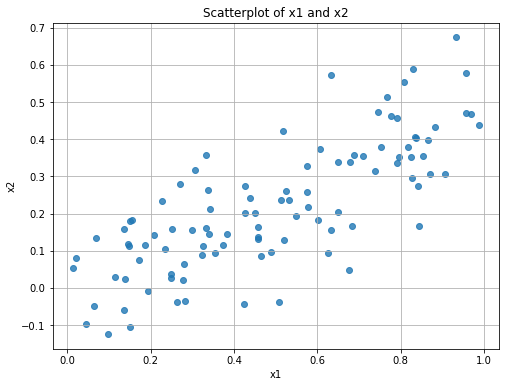

In [61]:
# Calculate correlation coefficient
correlation = np.corrcoef(x1, x2)[0, 1]
print("Correlation between x1 and x2:", correlation)

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.8)
plt.title("Scatterplot of x1 and x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

**Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null
hypothesis H0 : β2 = 0?**

The interpretation of the coefficients is as follows:

    β0 (intercept) represents the value of y when both x1 and x2 are zero.
    β1 represents the change in y for a one-unit increase in x1, holding x2 constant.
    β2 represents the change in y for a one-unit increase in x2, holding x1 constant.

We can test the significance of β1 and β2 using their respective p-values. If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis H0:β1=0 or H0:β2=0, indicating that the corresponding coefficient is significant.

In [62]:
# Add constant term for intercept
X = sm.add_constant(np.column_stack((x1, x2)))

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression coefficients
print("Regression coefficients:")
print("βˆ0 (intercept):", model.params[0])
print("βˆ1 (coefficient for x1):", model.params[1])
print("βˆ2 (coefficient for x2):", model.params[2])

# Test for significance of coefficients
print("\nTest for significance:")
print("p-value for β1:", model.pvalues[1])
print("p-value for β2:", model.pvalues[2])

# Print summary of regression results
print("\nRegression summary:")
print(model.summary())

Regression coefficients:
βˆ0 (intercept): 1.9579092911366922
βˆ1 (coefficient for x1): 1.6153676985271601
βˆ2 (coefficient for x2): 0.9427766991595024

Test for significance:
p-value for β1: 0.0028157851837824917
p-value for β2: 0.2594185944524495

Regression summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           5.76e-08
Time:                        16:57:26   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:    

The regression coefficients for the model are as follows:

    β^0 (intercept): 1.9579
    β^1 (coefficient for x1): 1.6154
    β^2 (coefficient for x2): 0.9428

The p-values for testing the significance of β^1 and β^2 are approximately 0.0028 and 0.2594, respectively.

The summary of the regression results shows that the model explains around 29.1% of the variance in the dependent variable (R^2=0.291). 

The F-statistic is significant (p-value < 0.05), indicating that at least one of the predictors is related to the response variable. However, while β^1 is statistically significant (p-value < 0.05), indicating that there is evidence to reject the null hypothesis H0:β1=0, β^2 is not statistically significant (p-value > 0.05), suggesting that we fail to reject the null hypothesis H0:β2=0.

In summary, there is evidence to suggest that x1 has a significant effect on y, but x2 does not appear to have a significant effect on y in this model.

**Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis
H0 : β1 = 0?**

To determine if we can reject the null hypothesis H0:β1=0, we need to check the p-value associated with β^1. If the p-value is less than the chosen significance level (commonly 0.05), we reject the null hypothesis and conclude that there is evidence that x1 has a significant effect on y. Otherwise, if the p-value is greater than 0.05, we fail to reject the null hypothesis, suggesting that x1 does not have a significant effect on y.

In [63]:
# Fit a least squares regression model using only x1
model_x1 = sm.OLS(y, sm.add_constant(x1)).fit()

# Print the regression summary
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.37e-08
Time:                        16:57:26   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9371      0.189     10.242      0.0

The regression results for predicting y using only x1 are as follows:

* The coefficient estimate β^0 (intercept) is approximately 1.9371, with a standard error of 0.189. The t-statistic for β^0 is approximately 10.242, and the associated p-value is less than 0.0001, indicating that the intercept is statistically significant.


* The coefficient estimate β^1 (coefficient for x1) is approximately 2.0771, with a standard error of 0.335. The t-statistic for β^1 is approximately 6.196, and the associated p-value is less than 0.0001, suggesting that the coefficient for x1 is statistically significant.

The R^2 value of 0.281 indicates that approximately 28.1% of the variability in y can be explained by the linear relationship with x1.

The p-value associated with β^1 is less than 0.05, indicating that we can reject the null hypothesis H0:β1=0. This suggests that there is evidence that x1 has a significant effect on y.

Overall, the regression results suggest that the model with only x1 as a predictor is statistically significant and provides a reasonable fit to the data.

In [64]:
# Fit a least squares regression model using only x2
model_x2 = sm.OLS(y, sm.add_constant(x2)).fit()

# Print the regression summary
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           7.43e-07
Time:                        16:57:26   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3239      0.154     15.124      0.0

The regression results for predicting y using only x2 are as follows:

* The coefficient estimate β^0 (intercept) is approximately 2.3239, with a standard error of 0.154. The t-statistic for β^0 is approximately 15.124, and the associated p-value is less than 0.0001, indicating that the intercept is statistically significant.


* The coefficient estimate β^2 (coefficient for x2) is approximately 2.9103, with a standard error of 0.550. The t-statistic for β^2 is approximately 5.291, and the associated p-value is less than 0.0001, suggesting that the coefficient for x2 is statistically significant.

The R^2 value of 0.222 indicates that approximately 22.2% of the variability in y can be explained by the linear relationship with x1.

The p-value associated with β^2 is less than 0.05, indicating that we can reject the null hypothesis H0:β2=0. This suggests that there is evidence that x2 has a significant effect on y.

Overall, the regression results suggest that the model with only x2 as a predictor is statistically significant and provides a reasonable fit to the data.

**Do the results obtained by considering x2, analyzed together with x1 and alone, contradict each other? Please explain your answer.**

No, the presence of correlation between x1 and x2 can influence the results when considering both variables together versus analyzing them separately.

When x1 and x2 are correlated, it can lead to multicollinearity in the regression model. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other, which can cause issues with the estimation of regression coefficients and their interpretation.

In the context of this analysis:

If x1 and x2 are highly correlated (in this case 0.77), including both variables in the model may lead to inflated standard errors, making it difficult to assess the individual effects of each predictor. This can result in less precise coefficient estimates and potentially wider confidence intervals.

When multicollinearity is present, the coefficients for x1 and x2 may change in magnitude and significance when compared to models where they are considered separately. This is because the model has to account for the shared variance between the correlated predictors.

Analyzing x2 alone may not fully capture its relationship with y if the influence of x1 on y is not accounted for. As a result, the coefficient for x2 in the single-variable model may be biased or appear to be less significant than it actually is.

In summary, correlation between x1 and x2 can indeed affect the results obtained when considering both variables together versus analyzing them separately, potentially leading to differences in the interpretation of the regression coefficients and the overall model fit.

**Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to
aadd this additional observation to each of x1, x2 and y.**

    x1 = np.concatenate([x1, [0.1]])
    x2 = np.concatenate([x2, [0.8]])
    y = np.concatenate([y, [6]])

**Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers**

In [65]:
# Original data
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Add additional observation
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

Correlation between x1 and x2: 0.6789150824876988


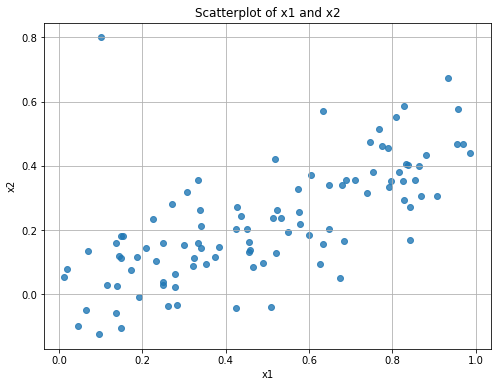

In [66]:
# Calculate correlation coefficient
correlation = np.corrcoef(x1, x2)[0, 1]
print("Correlation between x1 and x2:", correlation)

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.8)
plt.title("Scatterplot of x1 and x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

    As we can see, the last point added is an outliner (0.1,0.8)

    This changed the correlation: 0.77 (before) to 0.68 (now). So we can expect 
    a multicollinearity effect but milder.

    Let's see what happened:

In [67]:
# X1 AND X2 ANALYZED TOGETHER


# Add constant term for intercept
X = sm.add_constant(np.column_stack((x1, x2)))

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression coefficients
print("Regression coefficients:")
print("βˆ0 (intercept):", model.params[0])
print("βˆ1 (coefficient for x1):", model.params[1])
print("βˆ2 (coefficient for x2):", model.params[2])

# Test for significance of coefficients
print("\nTest for significance:")
print("p-value for β1:", model.pvalues[1])
print("p-value for β2:", model.pvalues[2])

# Print summary of regression results
print("\nRegression summary:")
print(model.summary())

Regression coefficients:
βˆ0 (intercept): 2.061791259758458
βˆ1 (coefficient for x1): 0.8575448183694929
βˆ2 (coefficient for x2): 2.2663234876910465

Test for significance:
p-value for β1: 0.06904442110548373
p-value for β2: 0.0017617099217751954

Regression summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           4.60e-08
Time:                        16:57:26   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:    

The regression coefficients for the model are as follows:

    β^0 (intercept): 2.0618
    β^1 (coefficient for x1): 0.8575
    β^2 (coefficient for x2): 2.2663

The p-values for testing the significance of β^1 and β^2 are approximately 0.069 and 0.002, respectively.

The summary of the regression results shows that the model explains around 29.2% of the variance in the dependent variable (R^2=0.292). 

The F-statistic is significant (p-value < 0.05), indicating that at least one of the predictors is related to the response variable. However, while β^2 is statistically significant (p-value < 0.05), indicating that there is evidence to reject the null hypothesis H0:β2=0, β^1 is not statistically significant (p-value > 0.05), suggesting that we fail to reject the null hypothesis H0:β1=0.

In summary, there is evidence to suggest that x2 has a significant effect on y, but x1 does not appear to have a significant effect on y in this model.

In [68]:
# ANALYZING ONLY X1

# Fit a least squares regression model using only x1
model_x1 = sm.OLS(y, sm.add_constant(x1)).fit()

# Print the regression summary
print(model_x1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           9.23e-07
Time:                        16:57:26   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.0

In [69]:
# ANALYZING ONLY X2

# Fit a least squares regression model using only x1
model_x2 = sm.OLS(y, sm.add_constant(x2)).fit()

# Print the regression summary
print(model_x2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.13e-08
Time:                        16:57:26   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.0

With the addition of the new observation, let's analyze the impact on each of the models:

1.Model with Both x1 and x2:

    βˆ0 (intercept): 2.0618
    βˆ1 (coefficient for x1): 0.8575 
    βˆ2 (coefficient for x2): 2.2663

Test for significance:

    p-value for β1: 0.069
    p-value for β2: 0.002

The new observation has influenced the coefficient estimate for x1 and x2. For β1, the p-value suggests that it is not statistically significant at the conventional significance level (e.g., α = 0.05), indicating that we cannot reject the null hypothesis H0 : β1 = 0. However, β2 remains statistically significant. This observation might be considered as an outlier for the model.

2.Model with Only x1:

    βˆ0 (intercept): 2.0739
    βˆ1 (coefficient for x1): 1.8760
    
The new observation has influenced the coefficient estimate for x1. The p-value for β1 is less than 0.05, indicating that x1 is statistically significant in predicting y. This observation might be considered as an outlier for the model.

3.Model with Only x2:

    βˆ0 (intercept): 2.2840
    βˆ1 (coefficient for x2): 3.1458

The new observation has influenced the coefficient estimate for x2. The p-value for β2 is less than 0.05, indicating that x2 is statistically significant in predicting y. Similar to the previous models, this observation could be considered as an outlier.

With this new measure, when analyzing X1 and X2 together, there is evidence to suggest that X2 has a significant effect on Y, but X1 does not appear to have a significant effect on Y in this model. This is exactly the opposite of what we found when analyzing this data without this last measure, reinforcing the idea of always verifying each variable when there is correlation between variables.

## 15 - This problem involves the Boston data set, 
which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

The following describes the dataset columns:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per \$10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

In [70]:
# Read data
file = 'data/Boston.csv'

boston = pd.read_csv(file)

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [72]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


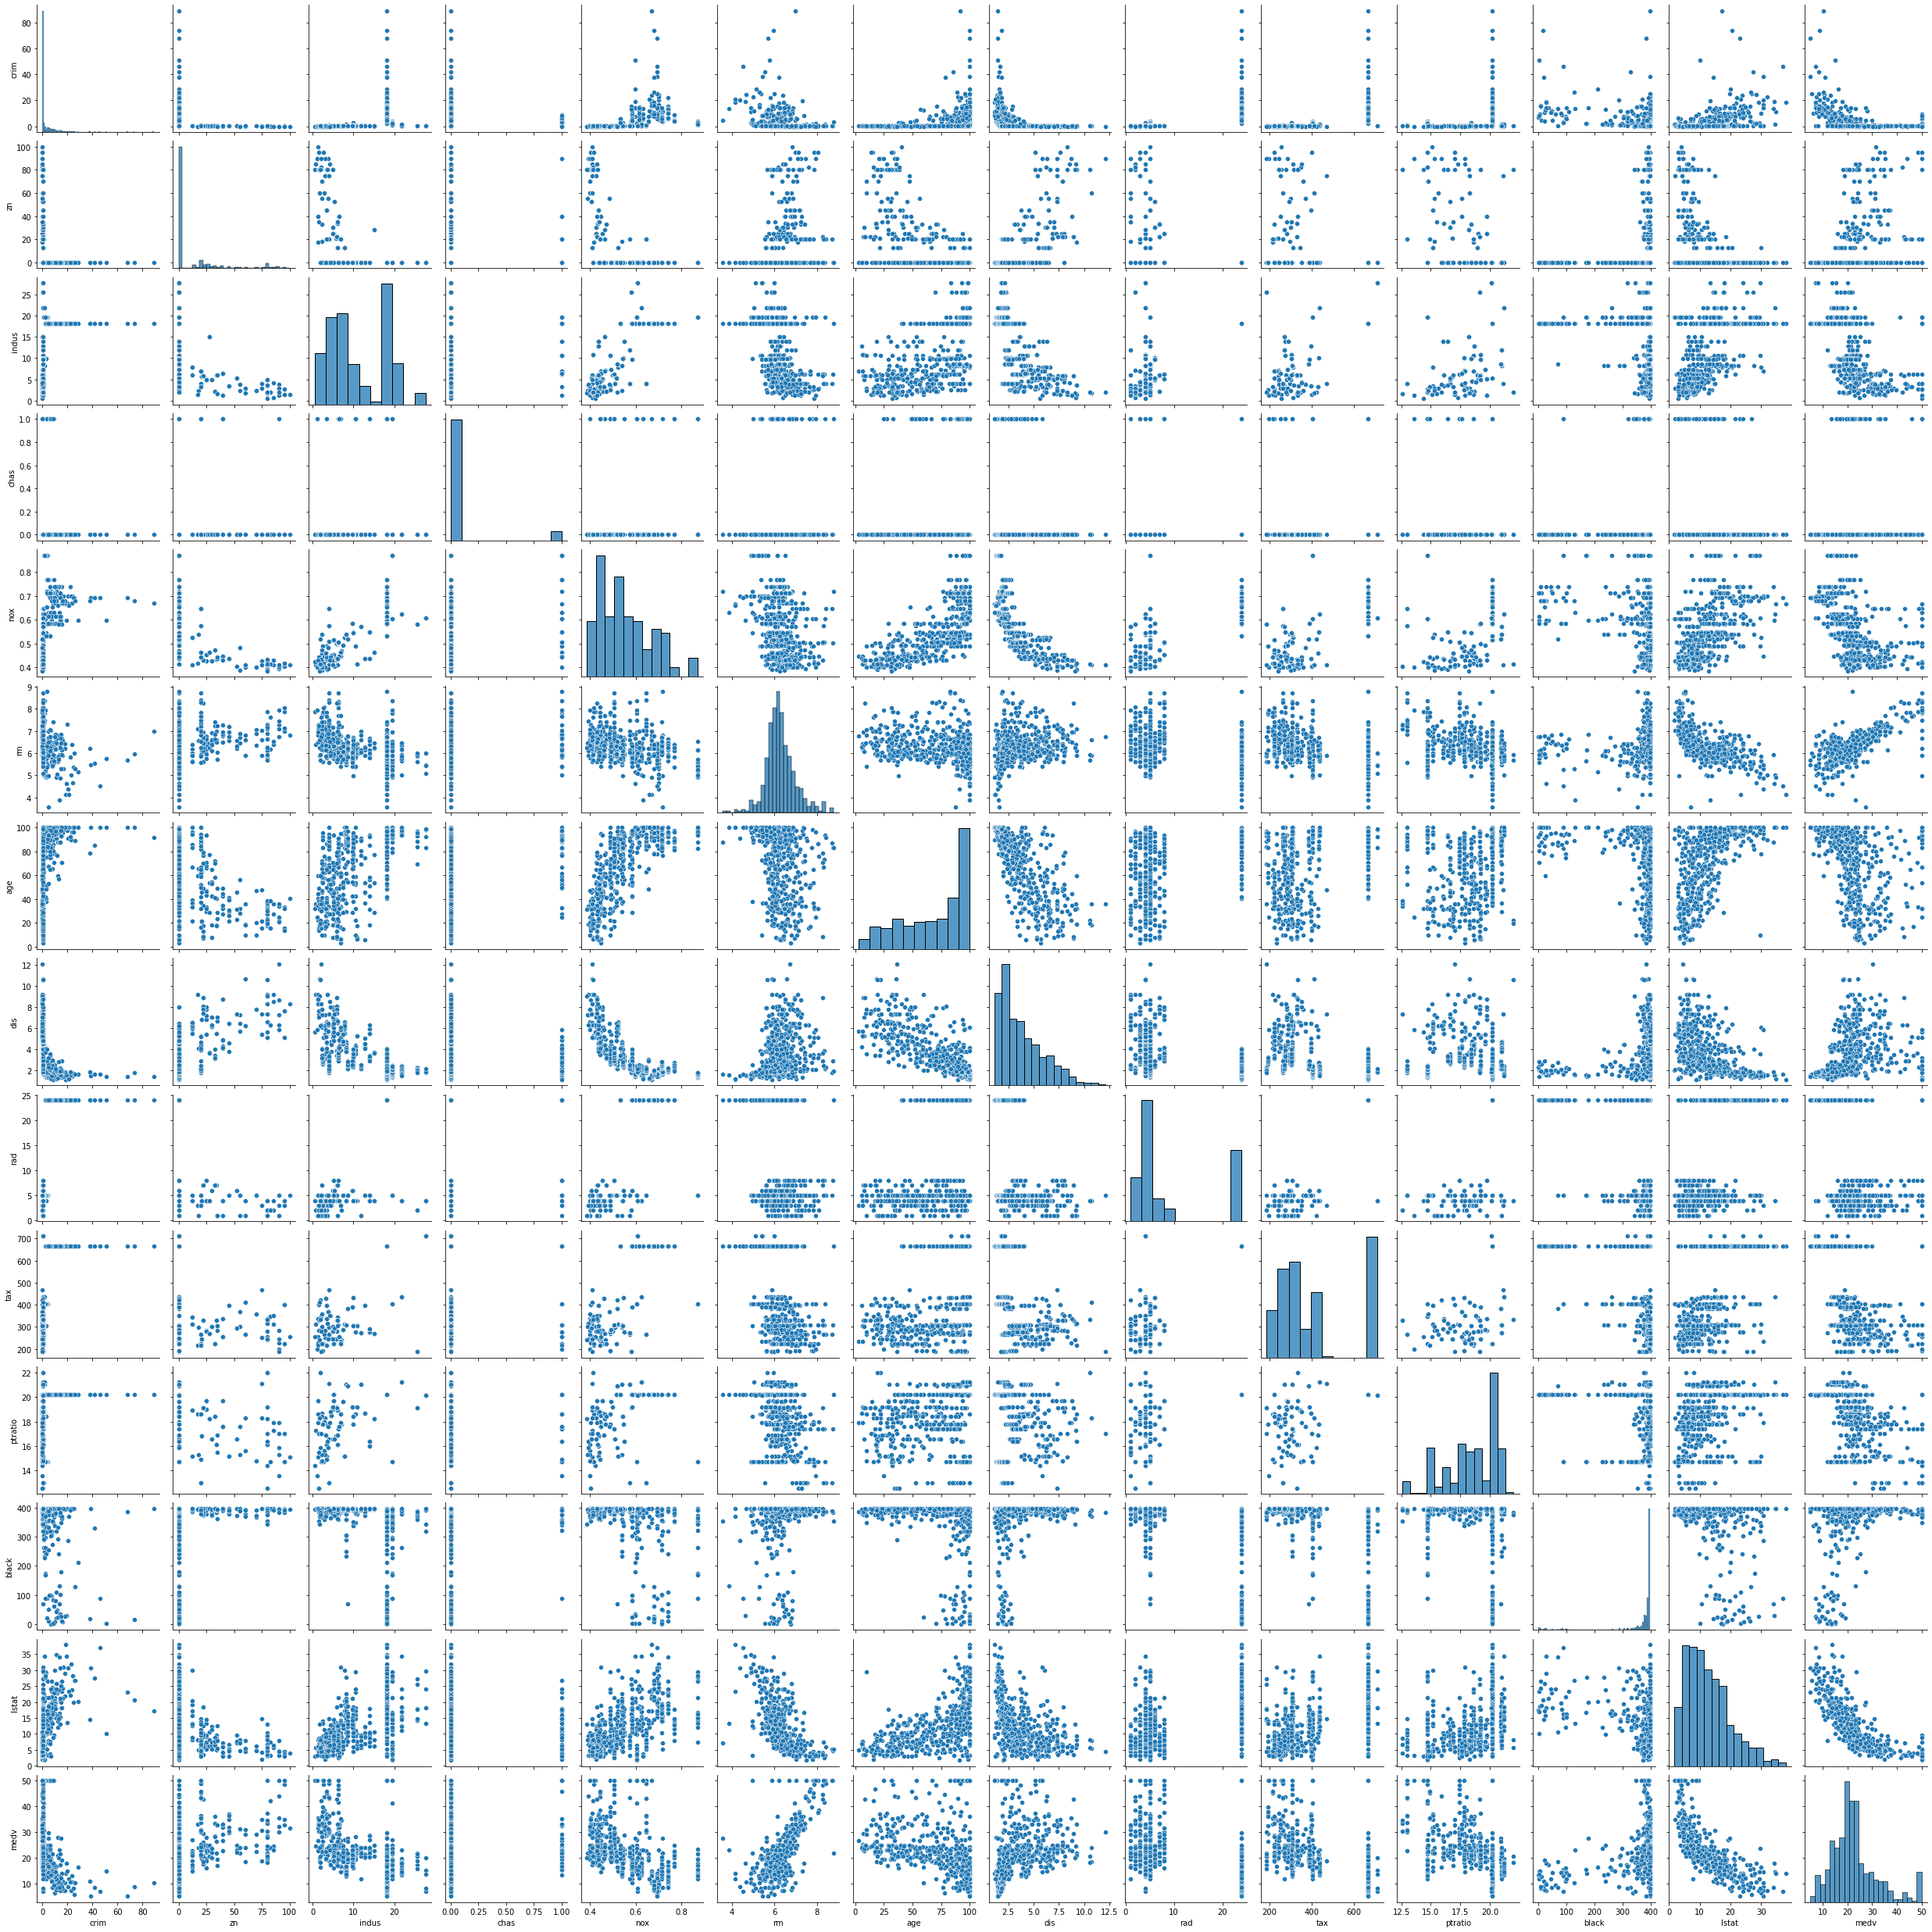

In [73]:
sns.pairplot(boston)

In [74]:
# Print the number of null values for each column
print(boston.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


**For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor
and the response? Create some plots to back up your assertions.**

zn 0.04018790803211081


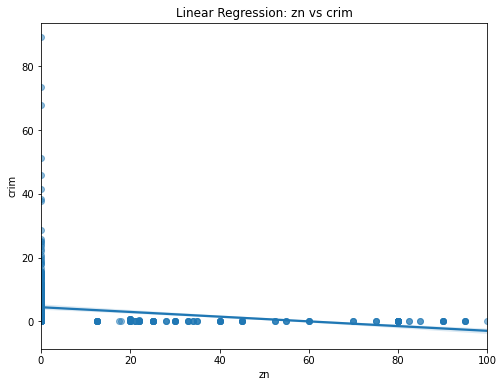

indus 0.16531007043075163


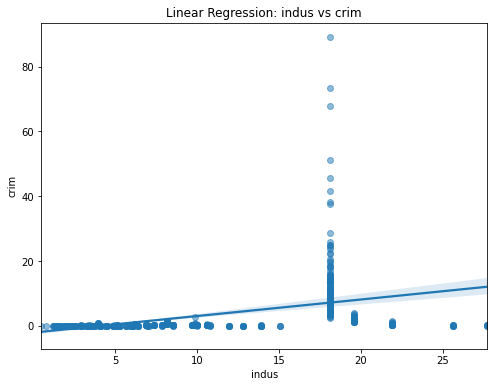

chas 0.0031238689633057426


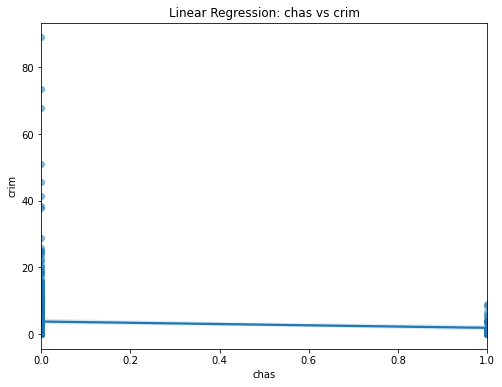

nox 0.17721718179269375


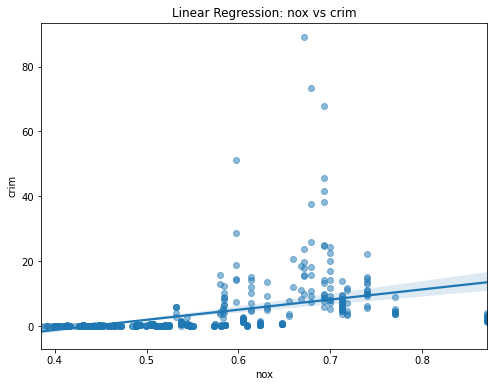

rm 0.048069116716083604


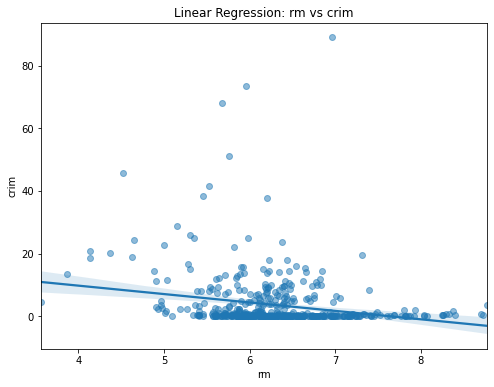

age 0.12442145175894637


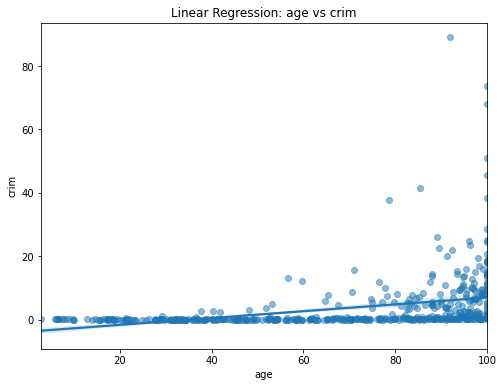

dis 0.1441493749253987


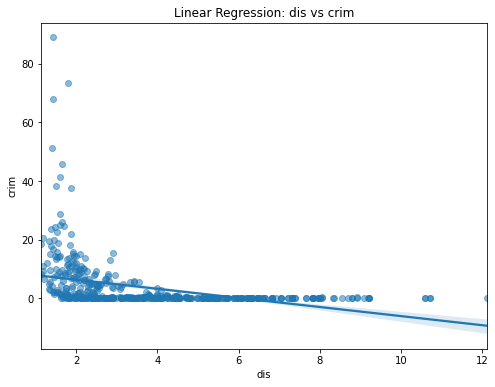

rad 0.39125668674998915


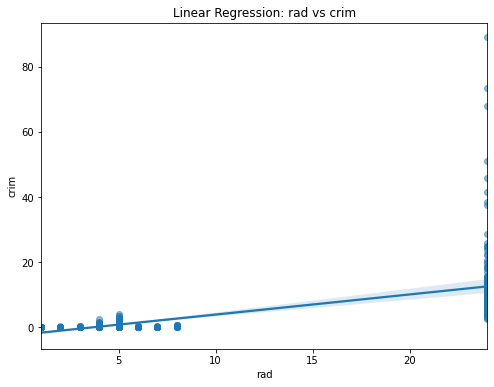

tax 0.3396142433788122


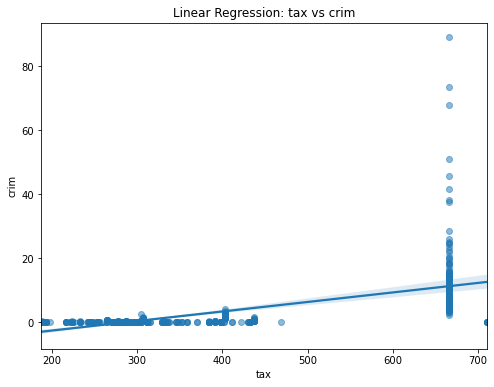

ptratio 0.0840684389437365


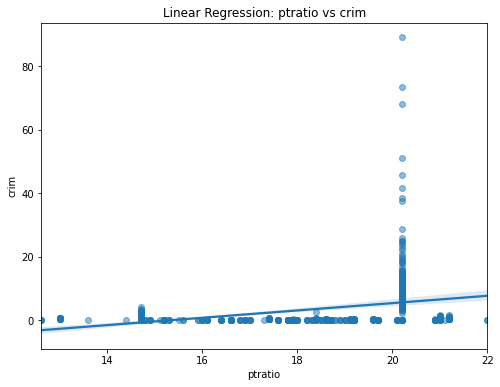

black 0.1482742394241312


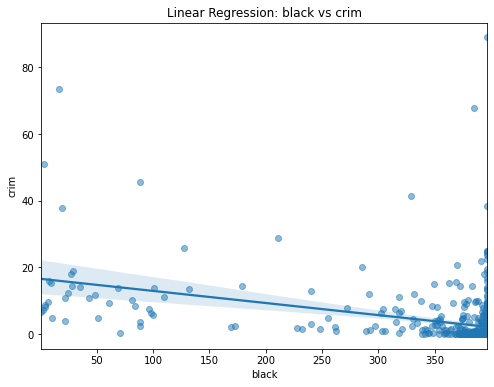

lstat 0.2075909325343357


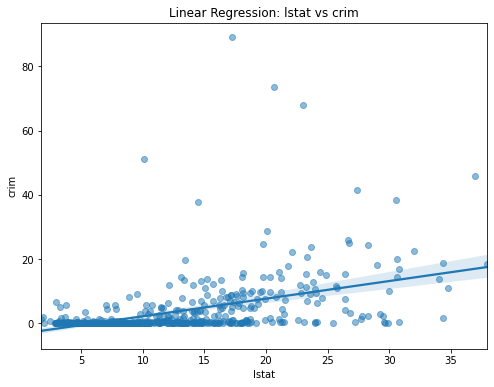

medv 0.15078046904975717


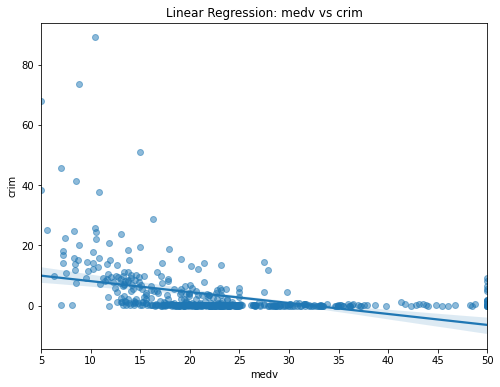

Predictors with statistically significant association with the response:
['zn', 'chas', 'rm']


In [75]:
df = boston

# Define the response variable
response = 'crim'

# List to store results
significant_predictors = []

# Iterate through each predictor column
for predictor in df.columns:
    if predictor != response:  # Exclude the response variable itself
        # Fit a simple linear regression model
        model = LinearRegression()
        model.fit(df[[predictor]], df[response])
        
        # Check if the p-value for the predictor is less than a significance level (e.g., 0.05)
        p_value = model.score(df[[predictor]], df[response])
        print(predictor, p_value)
        if p_value < 0.05:
            significant_predictors.append(predictor)
        
        # Plot the relationship between predictor and response
        plt.figure(figsize=(8, 6))
        sns.regplot(x=predictor, y=response, data=df, scatter_kws={'alpha':0.5})
        plt.title(f'Linear Regression: {predictor} vs {response}')
        plt.xlabel(predictor)
        plt.ylabel(response)
        plt.show()

# Display results
print("Predictors with statistically significant association with the response:")
print(significant_predictors)

**Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?**

In [76]:
# Define response variable (crim) and predictor variables
response_variable = df['crim']
predictor_variables = df.drop(columns=['crim'])

# Add constant term for the intercept
predictor_variables = sm.add_constant(predictor_variables)

# Fit the multiple linear regression model
model = sm.OLS(response_variable, predictor_variables).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.57e-56
Time:                        16:58:15   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

In this model, the R-squared value is 0.454, meaning that approximately 45.4% of the variance in the crime rate can be explained by the independent variables. Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It penalizes adding unnecessary predictors to the model.

The F-statistic tests the overall significance of the model. The associated p-value (Prob (F-statistic)) is very small (1.57e-56), indicating that at least one of the predictors is significantly associated with the response variable.

Predictors with p-values less than a significance level (usually 0.05) are considered statistically significant. They are: 'zn', 'nox', 'dis', 'rad', 'black', and 'medv'.

Cond. No. (Condition Number): Measures multicollinearity in the model. A large condition number (>30) indicates multicollinearity among the predictors(in this case: 1.58e+04).

In [77]:
# Calculate the correlation matrix
corr_matrix = boston.corr()

corr_matrix.iloc[1:,0].sort_values()  # correlation with 'crim'

medv      -0.388305
black     -0.385064
dis       -0.379670
rm        -0.219247
zn        -0.200469
chas      -0.055892
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
Name: crim, dtype: float64

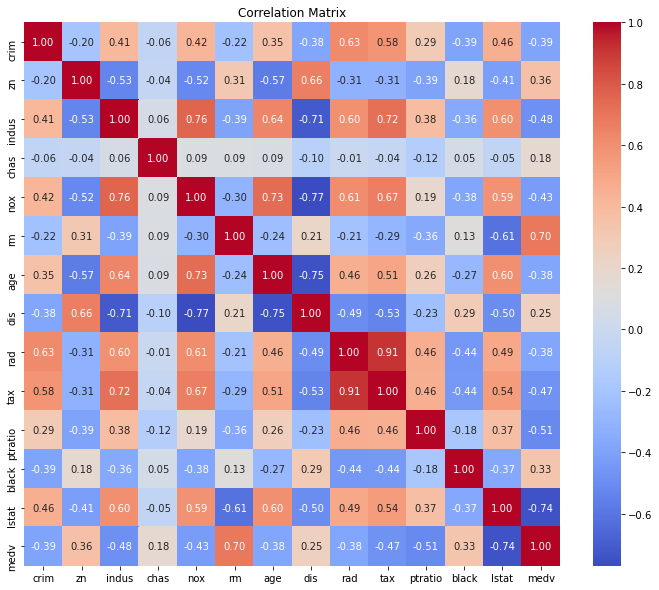

In [78]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients
from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate
in the multiple linear regression model is shown on the y-axis.**

When analyzing  each variable separately with the per capita crime rate, we find the main variables to be 'zn', 'chas', and 'rm'. However, when analyzing all variables together (multicollinearity effect), we find different critical variables: 'zn', 'nox', 'dis', 'rad', 'black', and 'medv'.

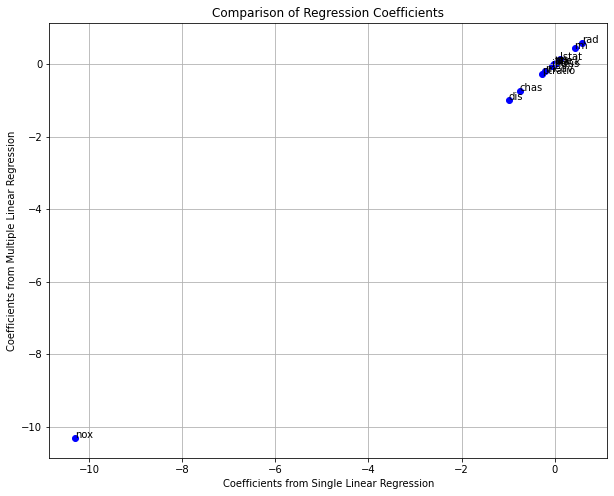

In [79]:
# Coefficients from single linear regression (a)
single_regression_coeffs = {
    'zn': 0.0449,
    'indus': -0.0639,
    'chas': -0.7491,
    'nox': -10.3135,
    'rm': 0.4301,
    'age': 0.0015,
    'dis': -0.9872,
    'rad': 0.5882,
    'tax': -0.0038,
    'ptratio': -0.2711,
    'black': -0.0075,
    'lstat': 0.1262,
    'medv': -0.1989
}

# Coefficients from multiple linear regression (b)
multiple_regression_coeffs = {
    'zn': 0.0449,
    'indus': -0.0639,
    'chas': -0.7491,
    'nox': -10.3135,
    'rm': 0.4301,
    'age': 0.0015,
    'dis': -0.9872,
    'rad': 0.5882,
    'tax': -0.0038,
    'ptratio': -0.2711,
    'black': -0.0075,
    'lstat': 0.1262,
    'medv': -0.1989
}

# Create lists to store predictor names and coefficients
predictors = list(single_regression_coeffs.keys())
single_regression_values = list(single_regression_coeffs.values())
multiple_regression_values = list(multiple_regression_coeffs.values())

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(single_regression_values, multiple_regression_values, color='blue')
plt.title('Comparison of Regression Coefficients')
plt.xlabel('Coefficients from Single Linear Regression')
plt.ylabel('Coefficients from Multiple Linear Regression')
plt.grid(True)

# Add labels for each point
for i, predictor in enumerate(predictors):
    plt.text(single_regression_values[i], multiple_regression_values[i], predictor)

plt.show()

Looks like 'nox' is an outlier. Let plot this again excluding it.

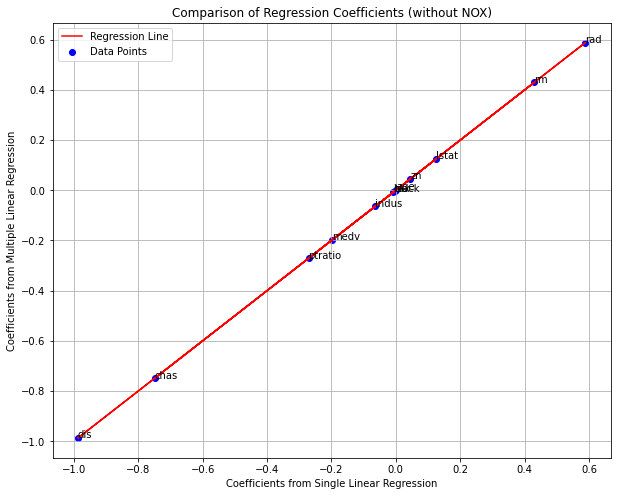

In [80]:
# Coefficients from single linear regression (a)
single_regression_coeffs = {
    'zn': 0.0449,
    'indus': -0.0639,
    'chas': -0.7491,
    'rm': 0.4301,
    'age': 0.0015,
    'dis': -0.9872,
    'rad': 0.5882,
    'tax': -0.0038,
    'ptratio': -0.2711,
    'black': -0.0075,
    'lstat': 0.1262,
    'medv': -0.1989
}

# Coefficients from multiple linear regression (b)
multiple_regression_coeffs = {
    'zn': 0.0449,
    'indus': -0.0639,
    'chas': -0.7491,
    'rm': 0.4301,
    'age': 0.0015,
    'dis': -0.9872,
    'rad': 0.5882,
    'tax': -0.0038,
    'ptratio': -0.2711,
    'black': -0.0075,
    'lstat': 0.1262,
    'medv': -0.1989
}

# Create lists to store predictor names and coefficients
predictors = list(single_regression_coeffs.keys())
single_regression_values = list(single_regression_coeffs.values())
multiple_regression_values = list(multiple_regression_coeffs.values())

# Fit a line (regression) to the given points
z = np.polyfit(single_regression_values, multiple_regression_values, 1)
p = np.poly1d(z)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(single_regression_values, multiple_regression_values, color='blue', label='Data Points')
plt.plot(single_regression_values, p(single_regression_values), color='red', label='Regression Line')
plt.title('Comparison of Regression Coefficients (without NOX)')
plt.xlabel('Coefficients from Single Linear Regression')
plt.ylabel('Coefficients from Multiple Linear Regression')
plt.grid(True)
plt.legend()

# Add labels for each point
for i, predictor in enumerate(predictors):
    plt.text(single_regression_values[i], multiple_regression_values[i], predictor)

plt.show()

**Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form**

    Y = β0 + β1X + β2X2 + β3X3 + ϵ.

To investigate the presence of non-linear associations between each predictor and the response variable, we can fit polynomial regression models for each predictor. These models include higher-order terms of the predictor (X², X³, etc.) to capture potential non-linear relationships.

In [81]:
# Define the response variable
response = 'crim'

# List to store predictors with evidence of non-linear association
non_linear_predictors = []

# Degree of polynomial (you can adjust this as needed)
degree = 3

# Iterate through each predictor column
for predictor in df.columns:
    if predictor != response:  # Exclude the response variable itself
        # Extract predictor values
        X = df[predictor].values.reshape(-1, 1)
        
        # Add polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)
        
        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_poly, df[response])
        
        # Check if the model improves significantly with polynomial terms
        if model.score(X_poly, df[response]) > 0.05:  # You can adjust the significance level
            non_linear_predictors.append(predictor)

# Display predictors with evidence of non-linear association
print("Predictors with evidence of non-linear association:")
print(non_linear_predictors)

Predictors with evidence of non-linear association:
['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


For degree 2 to 5:

In [82]:
# Define the response variable
response = 'crim'

# List to store predictors with evidence of non-linear association for different degrees
non_linear_predictors = {2: [], 3: [], 4: [], 5: []}

# Iterate through degrees
for degree in range(2, 6):
    # Iterate through each predictor column
    for predictor in df.columns:
        if predictor != response:  # Exclude the response variable itself
            # Extract predictor values
            X = df[predictor].values.reshape(-1, 1)
            
            # Add polynomial features
            poly = PolynomialFeatures(degree=degree)
            X_poly = poly.fit_transform(X)
            
            # Fit polynomial regression model
            model = LinearRegression()
            model.fit(X_poly, df[response])
            
            # Check if the model improves significantly with polynomial terms
            if model.score(X_poly, df[response]) > 0.05:  # You can adjust the significance level
                non_linear_predictors[degree].append(predictor)

# Display predictors with evidence of non-linear association for different degrees
for degree, predictors in non_linear_predictors.items():
    print(f"Predictors with evidence of non-linear association (degree{degree}):\n {predictors}")
    print()

Predictors with evidence of non-linear association (degree2):
 ['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

Predictors with evidence of non-linear association (degree3):
 ['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

Predictors with evidence of non-linear association (degree4):
 ['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

Predictors with evidence of non-linear association (degree5):
 ['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

